In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

In [3]:
df = pd.read_csv('spotify_history.csv')

In [4]:
df.head(5)


,spotify_track_uri,Time Stamp,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,7/8/2013 2:44,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,7/8/2013 2:45,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,7/8/2013 2:50,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,7/8/2013 2:52,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,7/8/2013 3:17,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [5]:
del df['spotify_track_uri']

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Time Stamp    149860 non-null  object
 1   platform      149860 non-null  object
 2   ms_played     149860 non-null  int64 
 3   track_name    149860 non-null  object
 4   artist_name   149860 non-null  object
 5   album_name    149860 non-null  object
 6   reason_start  149717 non-null  object
 7   reason_end    149743 non-null  object
 8   shuffle       149860 non-null  bool  
 9   skipped       149860 non-null  bool  
dtypes: bool(2), int64(1), object(7)
memory usage: 9.4+ MB


In [7]:
df['playtime_sec'] = df['ms_played'].apply(lambda x: x/1000)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Time Stamp    149860 non-null  object 
 1   platform      149860 non-null  object 
 2   ms_played     149860 non-null  int64  
 3   track_name    149860 non-null  object 
 4   artist_name   149860 non-null  object 
 5   album_name    149860 non-null  object 
 6   reason_start  149717 non-null  object 
 7   reason_end    149743 non-null  object 
 8   shuffle       149860 non-null  bool   
 9   skipped       149860 non-null  bool   
 10  playtime_sec  149860 non-null  float64
dtypes: bool(2), float64(1), int64(1), object(7)
memory usage: 10.6+ MB


## Top 10 Artists by Playtime

In [9]:
# Top artists by playtime 
total_playtime_artist = df.groupby('artist_name')['playtime_sec'].sum()
top_artists = total_playtime_artist.sort_values(ascending=False)

                                   

In [10]:
top_artists.head(10)

artist_name
The Beatles           1210184.552
The Killers           1059556.516
John Mayer             725219.443
Bob Dylan              569456.396
Paul McCartney         357354.370
Howard Shore           348930.675
The Strokes            317508.419
The Rolling Stones     307917.009
Pink Floyd             260531.842
Led Zeppelin           248338.279
Name: playtime_sec, dtype: float64

In [11]:
#Plotting bar graph for top artists with their playtimes of 2023 and 2024
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

In [12]:
df['Time Stamp']
df_filtered = df[df['Time Stamp'].dt.year.isin([2023,2024])]
df_filtered['year'] = df_filtered['Time Stamp'].dt.year

C:\Users\mahad\AppData\Local\Temp\ipykernel_8712\2979325395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['Time Stamp'].dt.year


In [13]:
print(df_filtered)

                Time Stamp platform  ms_played  \
128967 2023-01-01 00:51:00  android        465   
128968 2023-01-01 00:51:00  android       1028   
128969 2023-01-01 00:56:00  android     295466   
128970 2023-01-01 01:00:00  android     210933   
128971 2023-01-01 01:04:00  android     276666   
...                    ...      ...        ...   
149855 2024-12-15 23:06:00  android       1247   
149856 2024-12-15 23:06:00  android       1515   
149857 2024-12-15 23:06:00  android       1283   
149858 2024-12-15 23:06:00  android       1306   
149859 2024-12-15 23:06:00  android       1893   

                                               track_name      artist_name  \
128967  Saturday Night’s Alright (For Fighting) - Rema...       Elton John   
128968                                           Prismism          Keuning   
128969  Saturday Night’s Alright (For Fighting) - Rema...       Elton John   
128970  Zero - From the Original Motion Picture "Ralph...  Imagine Dragons   
128971   

In [14]:
#Data Aggregation

yearly_playtime = df_filtered.groupby(['artist_name','year'])['playtime_sec'].sum().sort_values(ascending=False)
top_artists = top_artists.head(10).index.tolist()

In [15]:
#Plotting bar graph

top_artists = yearly_playtime.groupby('artist_name').sum().sort_values(ascending=False)
top_10_artists = top_artists.head(10).index.tolist()
plot_data = yearly_playtime.loc[top_10_artists].unstack(level='year', fill_value=0)

AttributeError: 'int' object has no attribute 'set_hatch'

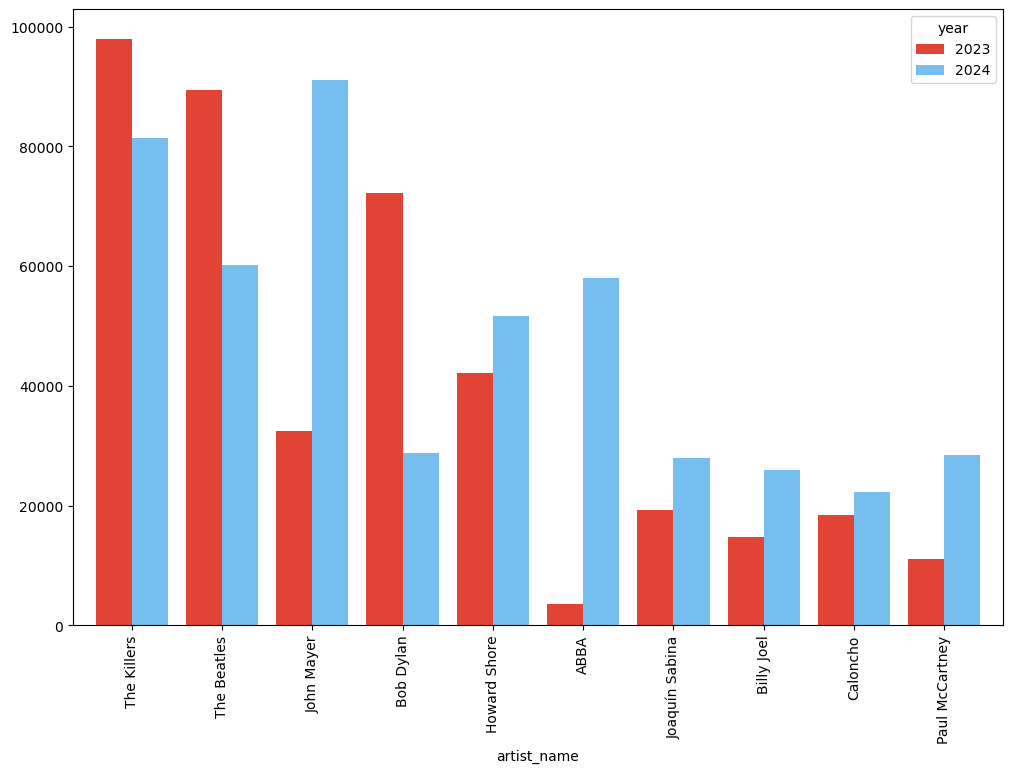

In [17]:
#Personalising bar graph
custom_colors = ['#E14434', '#77BEF0']
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
fig, ax = plt.subplots(figsize=(12,8))
plot_data.plot(kind='bar', ax=ax, width=0.8, color=custom_colors)
for bars in plot_data:
    bars.set_hatch(hatches.pop(0))



ax.set_title('Top 10 artists by playtime: 2023 vs 2024', fontsize=16)
ax.set_xlabel('Artist Name', fontsize=12)
ax.set_ylabel('Total Playtime(seconds)', fontsize=12)
plt.xticks(rotation=46, ha='right')
ax.legend(title='Year', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Top Songs with playtime and times skipped

In [40]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20893 entries, 128967 to 149859
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time Stamp    20893 non-null  datetime64[ns]
 1   platform      20893 non-null  object        
 2   ms_played     20893 non-null  int64         
 3   track_name    20893 non-null  object        
 4   artist_name   20893 non-null  object        
 5   album_name    20893 non-null  object        
 6   reason_start  20893 non-null  object        
 7   reason_end    20893 non-null  object        
 8   shuffle       20893 non-null  bool          
 9   skipped       20893 non-null  bool          
 10  playtime_sec  20893 non-null  float64       
 11  year          20893 non-null  int32         
dtypes: bool(2), datetime64[ns](1), float64(1), int32(1), int64(1), object(6)
memory usage: 1.7+ MB


In [95]:
#Grouping data by track_name to calculate total playtime and times skipped

song_metrics = df.groupby('track_name').agg(
    total_playtime_sec = ('playtime_sec', 'sum'),
    total_skips = ('skipped', 'count')
)

In [96]:
top_songs = song_metrics.sort_values(by='total_playtime_sec', ascending=False).head(10)

formatted_labels = [title.replace(' ', '\n', 1) for title in top_songs.index]

In [97]:
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Ode To The Mets to Caution
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_playtime_sec  10 non-null     float64
 1   total_skips         10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 240.0+ bytes


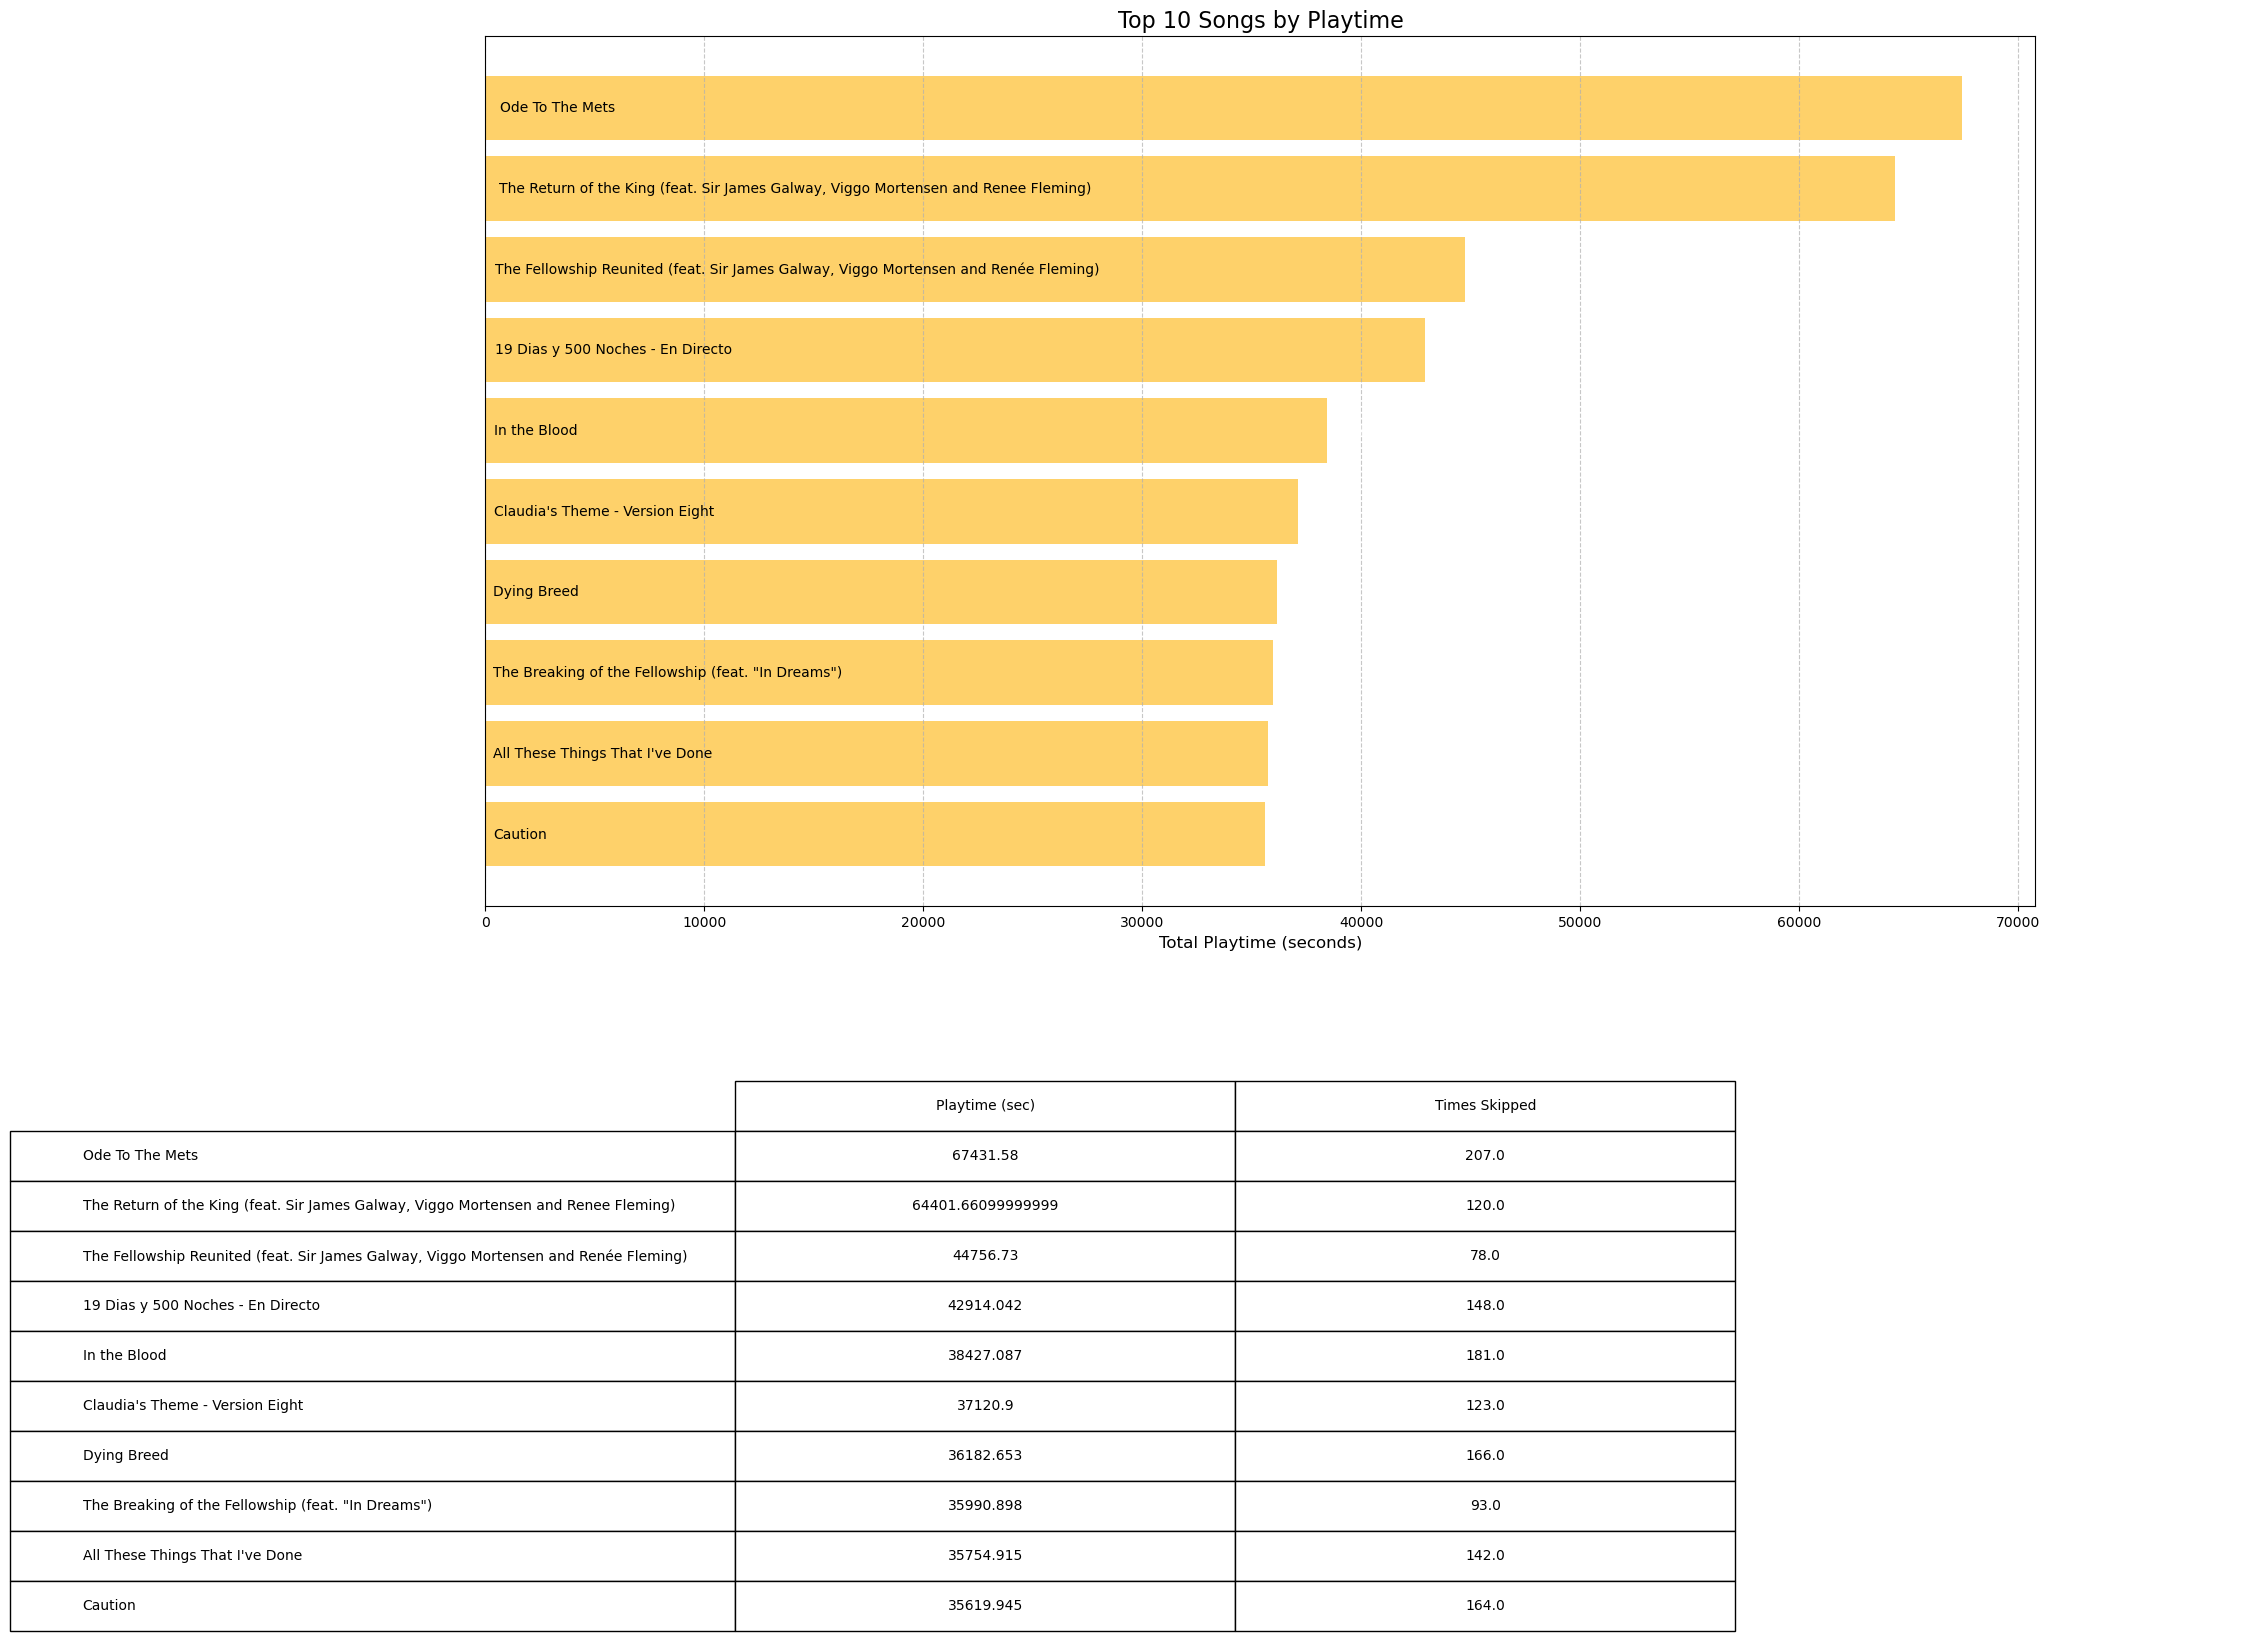

In [105]:
#Plotting Horizontal bar charts with labels inside

fig, ax = plt.subplots(figsize=(20,15))

bars = ax.barh(
    top_songs.index[::-1],
    top_songs['total_playtime_sec'][::-1],
    color='#FED16A'
)

#Adding title in bar for better clarity

for i, bar in enumerate(bars):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    song_name = top_songs.index[::-1][i]

    ax.text(
        width * 0.01,
        y,
        song_name,
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

    ax.text(
        width + 500,
        y,
        f'{width:.0f}s',
        ha='left',
        va='center',
        fontsize=10,
        color='white'
    )



#Set title and axis labels
ax.set_title('Top 10 Songs by Playtime', fontsize=16)
ax.set_xlabel('Total Playtime (seconds)', fontsize=12)
ax.set_ylabel('')

ax.yaxis.set_visible(False)

ax.grid(axis='x', linestyle='--', alpha=0.7)

#Add table below the plot
table_data = top_songs[[ 'total_playtime_sec', 'total_skips']].copy()
table_data.columns = [ 'Playtime (sec)', 'Times Skipped']

fig.subplots_adjust(bottom = 0.3)
table_ax = fig.add_axes([0, -0.1, 1, 0.2])
table_ax.axis('off')

the_table = table_ax.table(
    cellText=table_data.values,
    rowLabels=table_data.index,
    colLabels=table_data.columns,
    cellLoc='center',
    loc='center'
)
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(0.5, 3)


plt.show()

              
    

## Listening Activity by Hour of the day

In [99]:
# Extract hour of the dat from 'Time Stamp' column

df['hour'] = df['Time Stamp'].dt.hour

In [100]:
listening_activity = df.groupby('hour').size()
listening_activity.name = 'track_count'

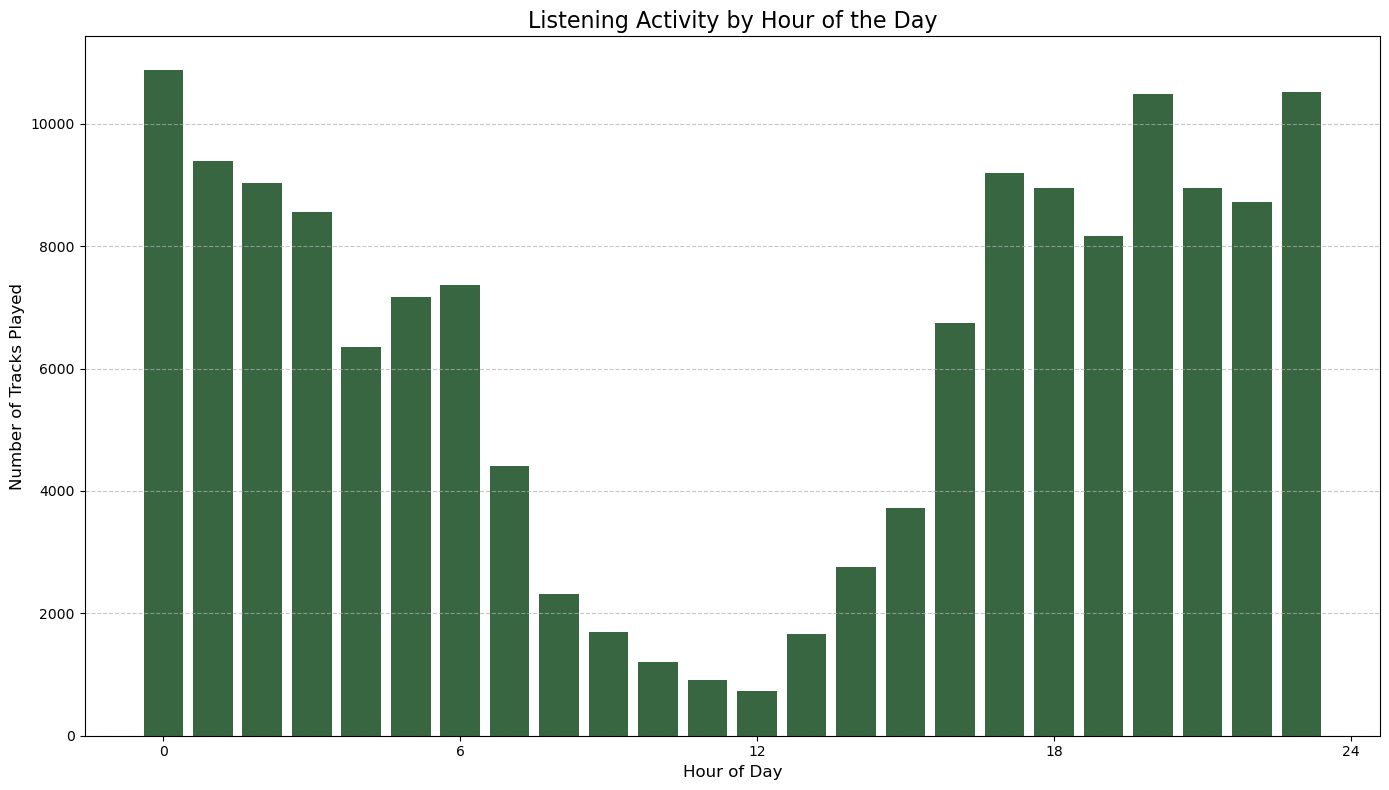

In [107]:
#Plotting bar graph

fig, ax = plt.subplots(figsize=(14,8))

ax.bar(listening_activity.index, listening_activity.values, color='#386641')

ax.set_title('Listening Activity by Hour of the Day', fontsize=16)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Number of Tracks Played', fontsize=12)

ax.set_xticks([0, 6, 12, 18, 24])

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()